In [1]:
# general and data handling
import numpy as np
import pandas as pd
import os
from collections import Counter

# Required RDKit modules
import rdkit as rd
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import RDConfig
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.rdMolDescriptors import GetAtomPairFingerprint
from rdkit.Chem.AtomPairs import Torsions
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys

# modeling
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
#from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import File:
mcf7 = pd.read_csv('V1/mcf7_V1.csv')
breast = pd.read_csv('V1/breast_V1.csv')
lung = pd.read_csv('V1/lung_V1.csv')
a549 = pd.read_csv('V1/a549_V1.csv')

In [3]:
print('MCF7 :',len(mcf7))
print('Breast :',len(breast))
print('Lung :',len(lung))
print('A549 :',len(a549))

MCF7 : 454
Breast : 538
Lung : 592
A549 : 375


In [4]:
mcf7["mol"] = [Chem.MolFromSmiles(x) for x in mcf7["CanonicalSMILES"]]
breast["mol"] = [Chem.MolFromSmiles(x) for x in breast["CanonicalSMILES"]]
lung["mol"] = [Chem.MolFromSmiles(x) for x in lung["CanonicalSMILES"]]
a549["mol"] = [Chem.MolFromSmiles(x) for x in a549["CanonicalSMILES"]]

In [5]:
print('MCF7 SMiles:',mcf7['CanonicalSMILES'].count())
print('Breast Smiles:',breast['CanonicalSMILES'].count())
print('lung Smiles:',lung['CanonicalSMILES'].count())
print('A549 Smiles:',a549['CanonicalSMILES'].count())

MCF7 SMiles: 454
Breast Smiles: 538
lung Smiles: 592
A549 Smiles: 375


In [6]:
# Maccs Fingerprint:
mcf7["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in mcf7["mol"]]
breast["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in breast["mol"]]
lung["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in lung["mol"]]
a549["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in a549["mol"]]

In [7]:
# Morgan 2 Fingerprint:
mcf7["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in mcf7["mol"]]
breast["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in breast["mol"]]
lung["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in lung["mol"]]
a549["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in a549["mol"]]

In [8]:
train_mcf7, test_mcf7 = train_test_split(mcf7, test_size=0.2, random_state=1,stratify=mcf7.Target.values)
train_breast, test_breast = train_test_split(breast, test_size=0.2, random_state=1,stratify=breast.Target.values)
train_lung, test_lung = train_test_split(lung, test_size=0.2, random_state=1,stratify=lung.Target.values)
train_a549, test_a549 = train_test_split(a549, test_size=0.2, random_state=1,stratify=a549.Target.values)

print('Training Data for MCF7:',len(train_mcf7),'\n')
print('Testing Data for MCF7:',len(test_mcf7),'\n')
print('***************************************************************************')
print('Training Data for Breast:',len(train_breast),'\n')
print('Testing Data for Breast:',len(test_breast),'\n')
print('***************************************************************************')
print('Training Data for lung:',len(train_lung),'\n')
print('Testing Data for lung:',len(test_lung),'\n')
print('***************************************************************************')
print('Training Data for a549:',len(train_a549),'\n')
print('Testing Data for a549:',len(test_a549),'\n')

Training Data for MCF7: 363 

Testing Data for MCF7: 91 

***************************************************************************
Training Data for Breast: 430 

Testing Data for Breast: 108 

***************************************************************************
Training Data for lung: 473 

Testing Data for lung: 119 

***************************************************************************
Training Data for a549: 300 

Testing Data for a549: 75 



In [9]:
def Counting(y):
    unique, counts = np.unique(y, return_counts=True)
    a=dict(zip(unique, counts))
    return str(a)

In [10]:
print('Train Set for MCF7 has:',Counting(train_mcf7['Target']))
print('Test Set for MCF7 has:',Counting(test_mcf7['Target']))
print('*********************************************************************')
print('Train Set for Breast has:',Counting(train_breast['Target']))
print('Test Set for Breast has:',Counting(test_breast['Target']))
print('*********************************************************************')
print('Train Set for Lung has:',Counting(train_lung['Target']))
print('Test Set for Lung has:',Counting(test_lung['Target']))
print('*********************************************************************')
print('Train Set for A549 has:',Counting(train_a549['Target']))
print('Test Set for A549 has:',Counting(test_a549['Target']))

Train Set for MCF7 has: {0: 204, 1: 159}
Test Set for MCF7 has: {0: 51, 1: 40}
*********************************************************************
Train Set for Breast has: {0: 236, 1: 194}
Test Set for Breast has: {0: 59, 1: 49}
*********************************************************************
Train Set for Lung has: {0: 249, 1: 224}
Test Set for Lung has: {0: 63, 1: 56}
*********************************************************************
Train Set for A549 has: {0: 157, 1: 143}
Test Set for A549 has: {0: 39, 1: 36}


In [11]:
def to_bit(fps):
    fp_np = []
    for fp in fps:
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        fp_np.append(arr)
    test = fp_np
    return test

### Maccs:

In [12]:
# MACCS Fingreprint:  # MCF7
X_Macc_train_mcf7=to_bit(train_mcf7['Maccs'])
y_Macc_train_mcf7=train_mcf7.Target.values

X_Macc_test_mcf7=to_bit(test_mcf7['Maccs'])
y_Macc_test_mcf7=test_mcf7.Target.values

In [13]:
# MACCS Fingreprint:  #Breast
X_Macc_train_breast=to_bit(train_breast['Maccs'])
y_Macc_train_breast=train_breast.Target.values

X_Macc_test_breast=to_bit(test_breast['Maccs'])
y_Macc_test_breast=test_breast.Target.values

In [14]:
# MACCS Fingreprint:  # Lung
X_Macc_train_lung=to_bit(train_lung['Maccs'])
y_Macc_train_lung=train_lung.Target.values

X_Macc_test_lung=to_bit(test_lung['Maccs'])
y_Macc_test_lung=test_lung.Target.values

In [15]:
# MACCS Fingreprint:  # A549
X_Macc_train_a549=to_bit(train_a549['Maccs'])
y_Macc_train_a549=train_a549.Target.values

X_Macc_test_a549=to_bit(test_a549['Maccs'])
y_Macc_test_a549=test_a549.Target.values

### Morgan2:

In [16]:
# Morgan 2 Fingreprint:   #MCF7
X_Morgan2_train_mcf7=to_bit(train_mcf7['morg2_fp'])
y_Morgan2_train_mcf7=train_mcf7.Target.values

X_Morgan2_test_mcf7=to_bit(test_mcf7['morg2_fp'])
y_Morgan2_test_mcf7=test_mcf7.Target.values

In [17]:
# Morgan 2 Fingreprint:  #Breast
X_Morgan2_train_breast=to_bit(train_breast['morg2_fp'])
y_Morgan2_train_breast=train_breast.Target.values

X_Morgan2_test_breast=to_bit(test_breast['morg2_fp'])
y_Morgan2_test_breast=test_breast.Target.values

In [18]:
# Morgan 2 Fingreprint:   #Lung
X_Morgan2_train_lung=to_bit(train_lung['morg2_fp'])
y_Morgan2_train_lung=train_lung.Target.values

X_Morgan2_test_lung=to_bit(test_lung['morg2_fp'])
y_Morgan2_test_lung=test_lung.Target.values

In [19]:
# Morgan 2 Fingreprint:   #A549
X_Morgan2_train_a549=to_bit(train_a549['morg2_fp'])
y_Morgan2_train_a549=train_a549.Target.values

X_Morgan2_test_a549=to_bit(test_a549['morg2_fp'])
y_Morgan2_test_a549=test_a549.Target.values

### Models:

<ol>
<li>Random forest (RF)</li>
<li>SVM</li>
<li>KNN</li>
<li>eXtreme Gradient Boosting (XGBoost)</li>
</ol>

In [20]:
def permonce_measure(y_test,y_pred):
    print("Accuracy Score:", round(accuracy_score(y_test, y_pred),3))
    print('Balanced Accuracy:',round(balanced_accuracy_score(y_test,y_pred),3))
    print("MCC Score:",round(matthews_corrcoef(y_test, y_pred),3))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    a3= Sensitivity = tp/(tp+fn)
    a4= Specificity = tn/(tn+fp)
    print("Sensitivity Score:",round(a3,3))
    print("Specificity Score:",round(a4,3))
    
    test_measure = {"Accuracy_test":round(accuracy_score(y_test, y_pred),3),
                    "Balanced Accuracy_test":round(balanced_accuracy_score(y_test,y_pred),3),
                    "MCC Score_test":round(matthews_corrcoef(y_test, y_pred),3),
                    "Sensitivity Score_test":round(a3,3),
                    "Specificity Score_test":round(a4,3)
                   }
    score=accuracy_score(y_test, y_pred)
    cm_macc_test = metrics.confusion_matrix(y_test, y_pred)
    #Graph:
    print('\n********************** Graph *****************************\n')
    plt.figure(figsize=(5,5))
    sns.heatmap(cm_macc_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    return test_measure

def roc_auc(y_val,prediction_probs,model_name):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_val))]
    # keep probabilities for the positive outcome only
    prediction_probs = prediction_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_val, ns_probs)
    prediction_probs_auc = roc_auc_score(y_val, prediction_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('ROC AUC=%.3f' % (prediction_probs_auc))
    roc_auc = {"AUC_Score_test":round(prediction_probs_auc,3)}
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
    prediction_probs_fpr, prediction_probs_tpr, _ = roc_curve(y_val, prediction_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(prediction_probs_fpr, prediction_probs_tpr, marker='.', label=model_name)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    return roc_auc

def cv_result(best_model,X_train,y_train):
    scoring={'accuracy':'accuracy',
            'balanced_accuracy':'balanced_accuracy',
            'roc_auc':'roc_auc',
            'specificity':make_scorer(recall_score,pos_label=0),
            'sensitivity':make_scorer(recall_score,pos_label=1),
            'MCC':make_scorer(matthews_corrcoef)}
    cv=cross_validate(best_model,X_train,y_train, cv=5,scoring=scoring)
    cv_df=pd.DataFrame(cv)
    Mean={'Accuracy':round(cv['test_accuracy'].mean(),3),
          'Balanced Accuracy':round(cv['test_balanced_accuracy'].mean(),3),
          'AUC_Score':round(cv['test_roc_auc'].mean(),3),
          'Specificity':round(cv['test_specificity'].mean(),3),
          'Sensitivity':round(cv['test_sensitivity'].mean(),3),
          'MCC':round(cv['test_MCC'].mean(),3)
         }
    print('Accuracy:',round(cv['test_accuracy'].mean(),3),'\nBalanced_accuracy:',round(cv['test_balanced_accuracy'].mean(),3),'\nAUC_Score:',round(cv['test_roc_auc'].mean(),3),'\nSpecificity:',round(cv['test_specificity'].mean(),3),'\nSensitivity:',round(cv['test_sensitivity'].mean(),3),'\nMCC:',round(cv['test_MCC'].mean(),3))
    return cv_df,Mean

## SVM:

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,recall_score,make_scorer
from sklearn.model_selection import cross_validate
from matplotlib import pyplot
from sklearn import svm

In [22]:
# Support Vector Machine:
SVM = svm.SVC(random_state = 1,probability=True)

In [23]:
param_grid_svm = {
    'C': [int(x) for x in range(1,11)], 
    'gamma': [float(x) for x in np.arange(0.001,0.1,0.001)]+['auto'],
    'kernel': ['rbf']
}

## For Maccs:

#### For MCF7

In [24]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_svm_mcf7_maccs = GridSearchCV(estimator = SVM, param_grid = param_grid_svm, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_svm_mcf7_maccs.fit(X_Macc_train_mcf7, y_Macc_train_mcf7)
print('\n******************************** Done *****************************************************')
MCF7_Maccs_SVM=pd.DataFrame(grid_search_svm_mcf7_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

******************************** Done *****************************************************
CPU times: user 1min 17s, sys: 794 ms, total: 1min 18s
Wall time: 4min 30s


In [25]:
print('  Best Parameter are:\n',grid_search_svm_mcf7_maccs.best_estimator_) # criterion = gini

  Best Parameter are:
 SVC(C=6, gamma=0.097, probability=True, random_state=1)


In [26]:
best_model_SVM_MCF7_Maccs = grid_search_svm_mcf7_maccs.best_estimator_
#best_model_SVM_MCF7_Maccs=svm.SVC(C=8, gamma=0.085, random_state=1,probability=True)

In [27]:
SVM_mcf7_maccs_cv,SVM_mcf7_maccs_mean=cv_result(best_model_SVM_MCF7_Maccs,X_Macc_train_mcf7,y_Macc_train_mcf7)

Accuracy: 0.799 
Balanced_accuracy: 0.797 
AUC_Score: 0.873 
Specificity: 0.808 
Sensitivity: 0.786 
MCC: 0.598


In [28]:
SVM_mcf7_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.049361,0.013544,0.794521,0.786204,0.887195,0.853659,0.71875,0.580427
1,0.055299,0.012196,0.849315,0.855564,0.903201,0.804878,0.90625,0.705769
2,0.045045,0.011522,0.739726,0.727134,0.800305,0.829268,0.62500,0.466894
3,0.045662,0.009428,0.861111,0.858379,0.911094,0.878049,0.83871,0.716758
4,0.050805,0.014879,0.750000,0.759375,0.864844,0.675000,0.84375,0.518750


#### MCF7 Test Set:

Accuracy Score: 0.78
Balanced Accuracy: 0.774
MCC Score: 0.552
Sensitivity Score: 0.725
Specificity Score: 0.824

********************** Graph *****************************



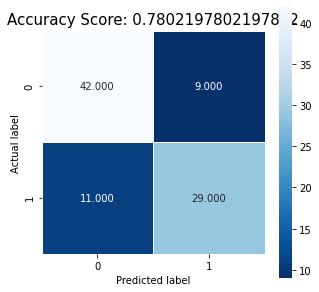

In [29]:
best_model_SVM_MCF7_Maccs.fit(X_Macc_train_mcf7, y_Macc_train_mcf7)
prediction_mcf7_maccs_SVM=best_model_SVM_MCF7_Maccs.predict(X_Macc_test_mcf7)
svm_test_mcf7_maccs=permonce_measure(y_Macc_test_mcf7,prediction_mcf7_maccs_SVM)

No Skill: ROC AUC=0.500
ROC AUC=0.839


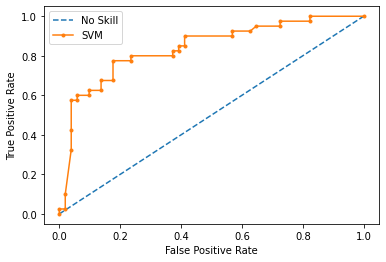

In [30]:
prediction_mcf7_maccs_SVM_probs = best_model_SVM_MCF7_Maccs.predict_proba(X_Macc_test_mcf7)
roc_auc_mcf7_maccs=roc_auc(y_Macc_test_mcf7,prediction_mcf7_maccs_SVM_probs,'SVM')
svm_test_mcf7_maccs.update(roc_auc_mcf7_maccs)

In [31]:
#MCF7_Maccs_SVM.to_csv('MCF7_Maccs_SVM_auc.csv',index=False)

--------------------------------------------------------------------------------------------------------------------

### For Breast:

In [32]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_svm_breast_maccs = GridSearchCV(estimator = SVM, param_grid = param_grid_svm, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_svm_breast_maccs.fit(X_Macc_train_breast, y_Macc_train_breast)
print('\n******************************** Done *****************************************************')
Breast_Maccs_SVM=pd.DataFrame(grid_search_svm_breast_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

******************************** Done *****************************************************
CPU times: user 1min 30s, sys: 704 ms, total: 1min 31s
Wall time: 5min 36s


In [33]:
print('  Best Parameter are:\n',grid_search_svm_breast_maccs.best_estimator_) # criterion='gini'

  Best Parameter are:
 SVC(C=5, gamma=0.056, probability=True, random_state=1)


In [34]:
best_model_SVM_Breast_Maccs = grid_search_svm_breast_maccs.best_estimator_
#best_model_SVM_Breast_Maccs=svm.SVC(C=2, gamma=0.084, random_state=1,probability=True)

In [35]:
SVM_breast_maccs_cv,SVM_breast_maccs_mean=cv_result(best_model_SVM_Breast_Maccs,X_Macc_train_breast,y_Macc_train_breast)

Accuracy: 0.749 
Balanced_accuracy: 0.746 
AUC_Score: 0.817 
Specificity: 0.775 
Sensitivity: 0.716 
MCC: 0.495


In [36]:
SVM_breast_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.055397,0.011775,0.767442,0.774141,0.794872,0.702128,0.846154,0.548282
1,0.053847,0.011486,0.779070,0.771686,0.825968,0.851064,0.692308,0.553270
2,0.055488,0.011888,0.755814,0.752591,0.823786,0.787234,0.717949,0.506428
3,0.052802,0.011037,0.755814,0.756956,0.849427,0.744681,0.769231,0.511822
4,0.051598,0.011530,0.686047,0.672149,0.790570,0.791667,0.552632,0.356111


#### Breast Test Set:

Accuracy Score: 0.806
Balanced Accuracy: 0.803
MCC Score: 0.607
Sensitivity Score: 0.776
Specificity Score: 0.831

********************** Graph *****************************



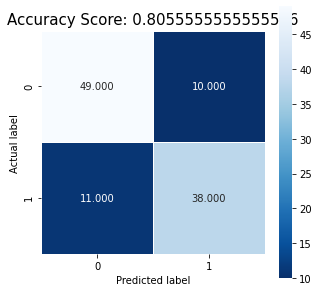

In [37]:
best_model_SVM_Breast_Maccs.fit(X_Macc_train_breast, y_Macc_train_breast)
prediction_breast_maccs_SVM=best_model_SVM_Breast_Maccs.predict(X_Macc_test_breast)
svm_test_breast_maccs = permonce_measure(y_Macc_test_breast,prediction_breast_maccs_SVM)

No Skill: ROC AUC=0.500
ROC AUC=0.842


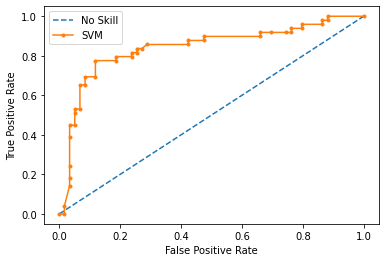

In [38]:
prediction_breast_maccs_SVM_probs = best_model_SVM_Breast_Maccs.predict_proba(X_Macc_test_breast)
roc_auc_breast_maccs=roc_auc(y_Macc_test_breast,prediction_breast_maccs_SVM_probs,'SVM')
svm_test_breast_maccs.update(roc_auc_breast_maccs)

In [39]:
#Breast_Maccs_SVM.to_csv('Breast_Maccs_SVM_auc.csv',index=False)

--------------------------------------------------------------------------------------------------------------------

### For Lung:

In [40]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_svm_lung_maccs = GridSearchCV(estimator = SVM, param_grid = param_grid_svm, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_svm_lung_maccs.fit(X_Macc_train_lung, y_Macc_train_lung)
print('\n******************************** Done *****************************************************')
Lung_Maccs_SVM=pd.DataFrame(grid_search_svm_lung_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

******************************** Done *****************************************************
CPU times: user 1min 39s, sys: 710 ms, total: 1min 40s
Wall time: 6min 47s


In [41]:
#Lung_Maccs_SVM.to_csv('Lung_Maccs_SVM_auc.csv',index=False)

In [42]:
print('  Best Parameter are:\n',grid_search_svm_lung_maccs.best_estimator_)

  Best Parameter are:
 SVC(C=8, gamma=0.078, probability=True, random_state=1)


In [43]:
best_model_SVM_Lung_Maccs = grid_search_svm_lung_maccs.best_estimator_
#best_model_SVM_Lung_Maccs=svm.SVC(C=1, gamma=0.099, random_state=1,probability=True)

In [44]:
SVM_lung_maccs_cv,SVM_lung_maccs_mean=cv_result(best_model_SVM_Lung_Maccs,X_Macc_train_lung,y_Macc_train_lung)

Accuracy: 0.695 
Balanced_accuracy: 0.693 
AUC_Score: 0.749 
Specificity: 0.739 
Sensitivity: 0.647 
MCC: 0.392


In [45]:
SVM_lung_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.090376,0.036042,0.673684,0.672222,0.758000,0.700000,0.644444,0.344905
1,0.103636,0.018425,0.778947,0.771111,0.825111,0.920000,0.622222,0.572827
2,0.087737,0.017142,0.694737,0.693333,0.745111,0.720000,0.666667,0.387183
3,0.083308,0.014569,0.680851,0.680272,0.724717,0.693878,0.666667,0.360544
4,0.080211,0.016325,0.648936,0.648182,0.694091,0.660000,0.636364,0.296027


#### Lung Test Set:

Accuracy Score: 0.697
Balanced Accuracy: 0.69
MCC Score: 0.394
Sensitivity Score: 0.571
Specificity Score: 0.81

********************** Graph *****************************



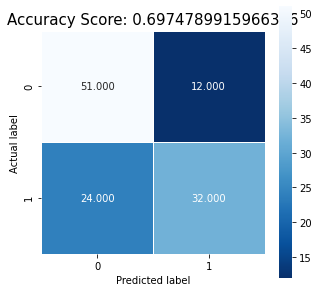

In [46]:
best_model_SVM_Lung_Maccs.fit(X_Macc_train_lung, y_Macc_train_lung)
prediction_lung_maccs_SVM=best_model_SVM_Lung_Maccs.predict(X_Macc_test_lung)
svm_test_lung_maccs = permonce_measure(y_Macc_test_lung,prediction_lung_maccs_SVM)

No Skill: ROC AUC=0.500
ROC AUC=0.767


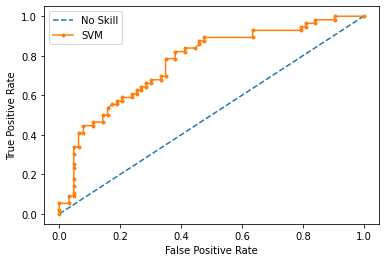

In [47]:
prediction_lung_maccs_SVM_probs = best_model_SVM_Lung_Maccs.predict_proba(X_Macc_test_lung)
roc_auc_lung_maccs=roc_auc(y_Macc_test_lung,prediction_lung_maccs_SVM_probs,'SVM')
svm_test_lung_maccs.update(roc_auc_lung_maccs)

--------------------------------------------------------------------------------------------------------------------

### For A549:

In [48]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_svm_a549_maccs = GridSearchCV(estimator = SVM, param_grid = param_grid_svm, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_svm_a549_maccs.fit(X_Macc_train_a549, y_Macc_train_a549)
print('\n******************************** Done *****************************************************')
A549_Maccs_SVM=pd.DataFrame(grid_search_svm_a549_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

******************************** Done *****************************************************
CPU times: user 34.2 s, sys: 274 ms, total: 34.5 s
Wall time: 2min 34s


In [49]:
#A549_Maccs_SVM.to_csv('A549_Maccs_SVM_auc.csv',index=False)

In [50]:
print('  Best Parameter are:\n',grid_search_svm_a549_maccs.best_estimator_)

  Best Parameter are:
 SVC(C=7, gamma=0.081, probability=True, random_state=1)


In [51]:
best_model_SVM_A549_Maccs = grid_search_svm_a549_maccs.best_estimator_
#best_model_SVM_A549_Maccs=svm.SVC(C=2, gamma=0.059000000000000004, random_state=1,probability=True)

In [52]:
SVM_a549_maccs_cv,SVM_a549_maccs_mean=cv_result(best_model_SVM_A549_Maccs,X_Macc_train_a549,y_Macc_train_a549)

Accuracy: 0.727 
Balanced_accuracy: 0.725 
AUC_Score: 0.789 
Specificity: 0.765 
Sensitivity: 0.686 
MCC: 0.453


In [53]:
SVM_a549_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.031359,0.009641,0.766667,0.765625,0.804129,0.781250,0.750000,0.531250
1,0.033296,0.010103,0.683333,0.683036,0.720982,0.687500,0.678571,0.365460
2,0.033809,0.008798,0.750000,0.750278,0.796440,0.741935,0.758621,0.500278
3,0.028457,0.008227,0.600000,0.596218,0.709121,0.709677,0.482759,0.197789
4,0.029822,0.009332,0.833333,0.830923,0.914349,0.903226,0.758621,0.670862


#### A549 Test Set:

Accuracy Score: 0.693
Balanced Accuracy: 0.697
MCC Score: 0.397
Sensitivity Score: 0.778
Specificity Score: 0.615

********************** Graph *****************************



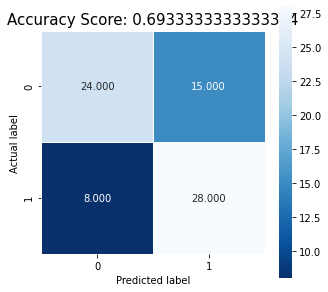

In [54]:
best_model_SVM_A549_Maccs.fit(X_Macc_train_a549, y_Macc_train_a549)
prediction_a549_maccs_SVM=best_model_SVM_A549_Maccs.predict(X_Macc_test_a549)
svm_test_a549_maccs = permonce_measure(y_Macc_test_a549,prediction_a549_maccs_SVM)

No Skill: ROC AUC=0.500
ROC AUC=0.762


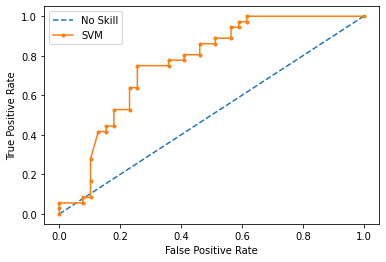

In [55]:
prediction_a549_maccs_SVM_probs = best_model_SVM_A549_Maccs.predict_proba(X_Macc_test_a549)
roc_auc_a549_maccs=roc_auc(y_Macc_test_a549,prediction_a549_maccs_SVM_probs,'SVM')
svm_test_a549_maccs.update(roc_auc_a549_maccs)

---------------------------------------------------------------------------------------------------------------------

## For Morgan2:

### For MCF7:

In [56]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_svm_mcf7_morgan2 = GridSearchCV(estimator = SVM, param_grid = param_grid_svm, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_svm_mcf7_morgan2.fit(X_Morgan2_train_mcf7, y_Morgan2_train_mcf7)
print('\n******************************** Done ******************************************************')
MCF7_Morgan2_SVM=pd.DataFrame(grid_search_svm_mcf7_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

******************************** Done ******************************************************
CPU times: user 1min 37s, sys: 19.4 s, total: 1min 56s
Wall time: 13min 12s


In [57]:
#MCF7_Morgan2_SVM.to_csv('MCF7_Morgan2_SVM_auc.csv',index=False)

In [58]:
print('  Best Parameter are:\n',grid_search_svm_mcf7_morgan2.best_estimator_)

  Best Parameter are:
 SVC(C=8, gamma=0.010000000000000002, probability=True, random_state=1)


In [59]:
best_model_SVM_MCF7_Morgan2 = grid_search_svm_mcf7_morgan2.best_estimator_
#best_model_SVM_MCF7_Morgan2=svm.SVC(C=1, gamma=0.047, random_state=1,probability=True)

In [60]:
SVM_mcf7_morgan2_cv,SVM_mcf7_morgan2_mean=cv_result(best_model_SVM_MCF7_Morgan2,X_Morgan2_train_mcf7,y_Morgan2_train_mcf7)

Accuracy: 0.818 
Balanced_accuracy: 0.813 
AUC_Score: 0.873 
Specificity: 0.858 
Sensitivity: 0.768 
MCC: 0.63


In [61]:
SVM_mcf7_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.169111,0.026528,0.780822,0.770579,0.839177,0.853659,0.687500,0.552212
1,0.128351,0.021965,0.808219,0.801829,0.858232,0.853659,0.750000,0.608784
2,0.125164,0.020895,0.835616,0.829649,0.865091,0.878049,0.781250,0.664897
3,0.136991,0.025592,0.861111,0.854445,0.936271,0.902439,0.806452,0.715680
4,0.134685,0.022607,0.805556,0.806250,0.866016,0.800000,0.812500,0.609649


#### Test set for MCF7:

Accuracy Score: 0.78
Balanced Accuracy: 0.772
MCC Score: 0.551
Sensitivity Score: 0.7
Specificity Score: 0.843

********************** Graph *****************************



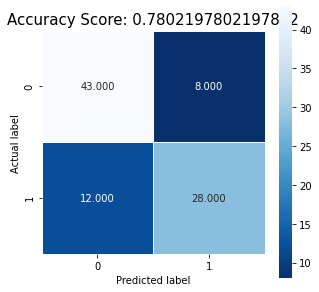

In [62]:
best_model_SVM_MCF7_Morgan2.fit(X_Morgan2_train_mcf7, y_Morgan2_train_mcf7)
prediction_mcf7_morgan2_SVM=best_model_SVM_MCF7_Morgan2.predict(X_Morgan2_test_mcf7)
svm_test_mcf7_morgan2 = permonce_measure(y_Morgan2_test_mcf7,prediction_mcf7_morgan2_SVM)

No Skill: ROC AUC=0.500
ROC AUC=0.836


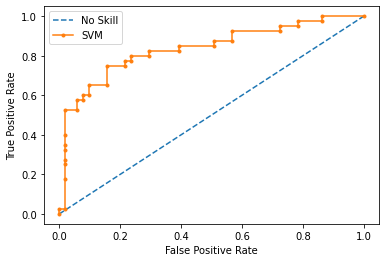

In [63]:
prediction_mcf7_morgan2_SVM_probs = best_model_SVM_MCF7_Morgan2.predict_proba(X_Morgan2_test_mcf7)
roc_auc_mcf7_morgan2=roc_auc(y_Morgan2_test_mcf7,prediction_mcf7_morgan2_SVM_probs,'SVM')
svm_test_mcf7_morgan2.update(roc_auc_mcf7_morgan2)

-------------------------------------------------------------------------------------------------------------------

### For Breast:

In [64]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_svm_breast_morgan2 = GridSearchCV(estimator = SVM, param_grid = param_grid_svm, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_svm_breast_morgan2.fit(X_Morgan2_train_breast, y_Morgan2_train_breast)
print('\n******************************** Done ******************************************************')
Breast_Morgan2_SVM=pd.DataFrame(grid_search_svm_breast_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

******************************** Done ******************************************************
CPU times: user 1min 55s, sys: 20.2 s, total: 2min 15s
Wall time: 20min 21s


In [65]:
#Breast_Morgan2_SVM.to_csv('Breast_Morgan2_SVM_auc.csv',index=False)

In [66]:
print('  Best Parameter are:\n',grid_search_svm_breast_morgan2.best_estimator_)

  Best Parameter are:
 SVC(C=6, gamma=0.008, probability=True, random_state=1)


In [67]:
best_model_SVM_Breast_Morgan2 = grid_search_svm_breast_morgan2.best_estimator_
#best_model_SVM_Breast_Morgan2=svm.SVC(C=2, gamma=0.037000000000000005, random_state=1,probability=True)

In [68]:
SVM_breast_morgan2_cv,SVM_breast_morgan2_mean=cv_result(best_model_SVM_Breast_Morgan2,X_Morgan2_train_breast,y_Morgan2_train_breast)

Accuracy: 0.786 
Balanced_accuracy: 0.781 
AUC_Score: 0.849 
Specificity: 0.826 
Sensitivity: 0.736 
MCC: 0.572


In [69]:
SVM_breast_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.205460,0.031332,0.837209,0.846699,0.906983,0.744681,0.948718,0.697213
1,0.191756,0.027184,0.744186,0.735406,0.807965,0.829787,0.641026,0.481986
2,0.186749,0.031342,0.802326,0.797327,0.868522,0.851064,0.743590,0.600080
3,0.187347,0.031433,0.813953,0.812330,0.872886,0.829787,0.794872,0.624659
4,0.188574,0.031301,0.732558,0.713816,0.788925,0.875000,0.552632,0.457588


#### Test set for Breast:

Accuracy Score: 0.741
Balanced Accuracy: 0.737
MCC Score: 0.476
Sensitivity Score: 0.694
Specificity Score: 0.78

********************** Graph *****************************



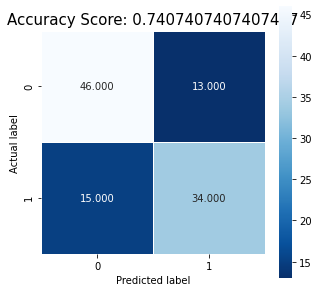

In [70]:
best_model_SVM_Breast_Morgan2.fit(X_Morgan2_train_breast, y_Morgan2_train_breast)
prediction_breast_morgan2_SVM=best_model_SVM_Breast_Morgan2.predict(X_Morgan2_test_breast)
svm_test_breast_morgan2 = permonce_measure(y_Morgan2_test_breast,prediction_breast_morgan2_SVM)

No Skill: ROC AUC=0.500
ROC AUC=0.840


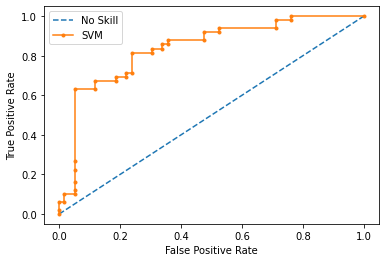

In [71]:
prediction_breast_morgan2_SVM_probs = best_model_SVM_Breast_Morgan2.predict_proba(X_Morgan2_test_breast)
roc_auc_breast_morgan2=roc_auc(y_Morgan2_test_breast,prediction_breast_morgan2_SVM_probs,'SVM')
svm_test_breast_morgan2.update(roc_auc_breast_morgan2)

--------------------------------------------------------------------------------------------------------------------

### For Lung:

In [72]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_svm_lung_morgan2 = GridSearchCV(estimator = SVM, param_grid = param_grid_svm, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_svm_lung_morgan2.fit(X_Morgan2_train_lung, y_Morgan2_train_lung)
print('\n******************************** Done ******************************************************')
Lung_Morgan2_SVM=pd.DataFrame(grid_search_svm_lung_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

******************************** Done ******************************************************
CPU times: user 2min 6s, sys: 21.6 s, total: 2min 28s
Wall time: 25min 40s


In [73]:
#Lung_Morgan2_SVM.to_csv('Lung_Morgan2_SVM_auc.csv',index=False)

In [74]:
print('  Best Parameter are:\n',grid_search_svm_lung_morgan2.best_estimator_)

  Best Parameter are:
 SVC(C=10, gamma=0.012, probability=True, random_state=1)


In [75]:
best_model_SVM_Lung_Morgan2 = grid_search_svm_lung_morgan2.best_estimator_
#best_model_SVM_Lung_Morgan2=svm.SVC(C=4, gamma=0.099, random_state=1,probability=True)

In [76]:
SVM_lung_morgan2_cv,SVM_lung_morgan2_mean=cv_result(best_model_SVM_Lung_Morgan2,X_Morgan2_train_lung,y_Morgan2_train_lung)

Accuracy: 0.729 
Balanced_accuracy: 0.728 
AUC_Score: 0.778 
Specificity: 0.747 
Sensitivity: 0.71 
MCC: 0.461


In [77]:
SVM_lung_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.246195,0.036530,0.705263,0.708889,0.772889,0.640000,0.777778,0.420024
1,0.233626,0.039535,0.778947,0.773333,0.829333,0.880000,0.666667,0.562648
2,0.229631,0.037998,0.694737,0.693333,0.726222,0.720000,0.666667,0.387183
3,0.228282,0.037177,0.734043,0.734014,0.771882,0.734694,0.733333,0.467709
4,0.230910,0.036707,0.734043,0.732273,0.788182,0.760000,0.704545,0.465286


#### Test set for Lung:

Accuracy Score: 0.765
Balanced Accuracy: 0.763
MCC Score: 0.527
Sensitivity Score: 0.732
Specificity Score: 0.794

********************** Graph *****************************



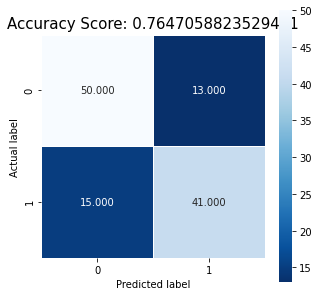

In [78]:
best_model_SVM_Lung_Morgan2.fit(X_Morgan2_train_lung, y_Morgan2_train_lung)
prediction_lung_morgan2_SVM=best_model_SVM_Lung_Morgan2.predict(X_Morgan2_test_lung)
svm_test_lung_morgan2 = permonce_measure(y_Morgan2_test_lung,prediction_lung_morgan2_SVM)

No Skill: ROC AUC=0.500
ROC AUC=0.819


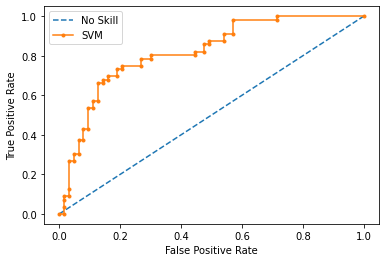

In [79]:
prediction_lung_morgan2_SVM_probs = best_model_SVM_Lung_Morgan2.predict_proba(X_Morgan2_test_lung)
roc_auc_lung_morgan2=roc_auc(y_Morgan2_test_lung,prediction_lung_morgan2_SVM_probs,'SVM')
svm_test_lung_morgan2.update(roc_auc_lung_morgan2)

---------------------------------------------------------------------------------------------------------------------

### For A549:

In [80]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_svm_a549_morgan2 = GridSearchCV(estimator = SVM, param_grid = param_grid_svm, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_svm_a549_morgan2.fit(X_Morgan2_train_a549, y_Morgan2_train_a549)
print('\n******************************** Done ******************************************************')
A549_Morgan2_SVM=pd.DataFrame(grid_search_svm_a549_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

******************************** Done ******************************************************
CPU times: user 1min 18s, sys: 1.87 s, total: 1min 20s
Wall time: 9min 17s


In [81]:
#A549_Morgan2_SVM.to_csv('A549_Morgan2_SVM_auc.csv',index=False)

In [82]:
print('  Best Parameter are:\n',grid_search_svm_a549_morgan2.best_estimator_)

  Best Parameter are:
 SVC(C=5, gamma=0.013000000000000001, probability=True, random_state=1)


In [83]:
best_model_SVM_A549_Morgan2 = grid_search_svm_a549_morgan2.best_estimator_
#best_model_SVM_A549_Morgan2 = svm.SVC(C=4, gamma=0.025, random_state=1,probability=True)

In [84]:
SVM_a549_morgan2_cv,SVM_a549_morgan2_mean=cv_result(best_model_SVM_A549_Morgan2,X_Morgan2_train_a549,y_Morgan2_train_a549)

Accuracy: 0.763 
Balanced_accuracy: 0.761 
AUC_Score: 0.839 
Specificity: 0.816 
Sensitivity: 0.707 
MCC: 0.533


In [85]:
SVM_a549_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.128057,0.030188,0.783333,0.781250,0.858259,0.812500,0.750000,0.564076
1,0.113087,0.024116,0.766667,0.765625,0.822545,0.781250,0.750000,0.531250
2,0.098601,0.020730,0.683333,0.684650,0.810901,0.645161,0.724138,0.369917
3,0.092792,0.018942,0.750000,0.745829,0.805339,0.870968,0.620690,0.509846
4,0.095960,0.020571,0.833333,0.828699,0.898776,0.967742,0.689655,0.688756


#### Test set for A549:

Accuracy Score: 0.72
Balanced Accuracy: 0.723
MCC Score: 0.451
Sensitivity Score: 0.806
Specificity Score: 0.641

********************** Graph *****************************



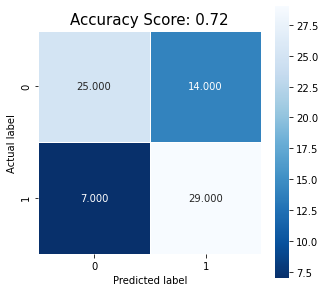

In [86]:
best_model_SVM_A549_Morgan2.fit(X_Morgan2_train_a549, y_Morgan2_train_a549)
prediction_a549_morgan2_SVM=best_model_SVM_A549_Morgan2.predict(X_Morgan2_test_a549)
svm_test_a549_morgan2 = permonce_measure(y_Morgan2_test_a549,prediction_a549_morgan2_SVM)

No Skill: ROC AUC=0.500
ROC AUC=0.788


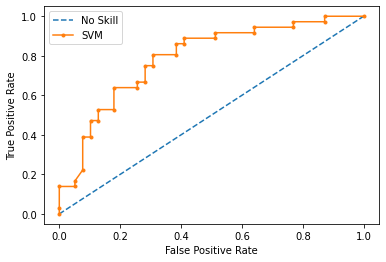

In [87]:
prediction_a549_morgan2_SVM_probs = best_model_SVM_A549_Morgan2.predict_proba(X_Morgan2_test_a549)
roc_auc_a549_morgan2=roc_auc(y_Morgan2_test_a549,prediction_a549_morgan2_SVM_probs,'SVM')
svm_test_a549_morgan2.update(roc_auc_a549_morgan2)

## EnD!

In [88]:
Model = pd.DataFrame({'Model':['SVM_MCF7_MACCS','SVM_Breast_MACCS','SVM_Lung_MACCS','SVM_A549_MACCS','SVM_MCF7_MORGAN2','SVM_Breast_MORGAN2','SVM_Lung_MORGAN2','SVM_A549_MORGAN2']})
parameters=pd.DataFrame([grid_search_svm_mcf7_maccs.best_params_,grid_search_svm_breast_maccs.best_params_,grid_search_svm_lung_maccs.best_params_,grid_search_svm_a549_maccs.best_params_,grid_search_svm_mcf7_morgan2.best_params_,grid_search_svm_breast_morgan2.best_params_,grid_search_svm_lung_morgan2.best_params_,grid_search_svm_a549_morgan2.best_params_])
cv_set=pd.DataFrame([SVM_mcf7_maccs_mean,SVM_breast_maccs_mean,SVM_lung_maccs_mean,SVM_a549_maccs_mean,SVM_mcf7_morgan2_mean,SVM_breast_morgan2_mean,SVM_lung_morgan2_mean,SVM_a549_morgan2_mean])
test_set=pd.DataFrame([svm_test_mcf7_maccs,svm_test_breast_maccs,svm_test_lung_maccs,svm_test_a549_maccs,svm_test_mcf7_morgan2,svm_test_breast_morgan2,svm_test_lung_morgan2,svm_test_a549_morgan2])
final_result=pd.concat([Model,parameters,cv_set,test_set],axis=1)
final_result

,Model,C,gamma,kernel,Accuracy,Balanced Accuracy,AUC_Score,Specificity,Sensitivity,MCC,Accuracy_test,Balanced Accuracy_test,MCC Score_test,Sensitivity Score_test,Specificity Score_test,AUC_Score_test
0,SVM_MCF7_MACCS,6,0.097,rbf,0.799,0.797,0.873,0.808,0.786,0.598,0.780,0.774,0.552,0.725,0.824,0.839
1,SVM_Breast_MACCS,5,0.056,rbf,0.749,0.746,0.817,0.775,0.716,0.495,0.806,0.803,0.607,0.776,0.831,0.842
2,SVM_Lung_MACCS,8,0.078,rbf,0.695,0.693,0.749,0.739,0.647,0.392,0.697,0.690,0.394,0.571,0.810,0.767
3,SVM_A549_MACCS,7,0.081,rbf,0.727,0.725,0.789,0.765,0.686,0.453,0.693,0.697,0.397,0.778,0.615,0.762
4,SVM_MCF7_MORGAN2,8,0.010,rbf,0.818,0.813,0.873,0.858,0.768,0.630,0.780,0.772,0.551,0.700,0.843,0.836
5,SVM_Breast_MORGAN2,6,0.008,rbf,0.786,0.781,0.849,0.826,0.736,0.572,0.741,0.737,0.476,0.694,0.780,0.840
6,SVM_Lung_MORGAN2,10,0.012,rbf,0.729,0.728,0.778,0.747,0.710,0.461,0.765,0.763,0.527,0.732,0.794,0.819
7,SVM_A549_MORGAN2,5,0.013,rbf,0.763,0.761,0.839,0.816,0.707,0.533,0.720,0.723,0.451,0.806,0.641,0.788
